In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sample_game_1_events = pd.read_csv('data/Sample_Game_1/Sample_Game_1_RawEventsData.csv')
sample_game_1_events

,Team,Type,Subtype,Period,Start Frame,Start Time [s],End Frame,End Time [s],From,To,Start X,Start Y,End X,End Y
0,Away,SET PIECE,KICK OFF,1,1,0.04,0,0.00,Player19,NaN,NaN,NaN,NaN,NaN
1,Away,PASS,NaN,1,1,0.04,3,0.12,Player19,Player21,0.45,0.39,0.55,0.43
2,Away,PASS,NaN,1,3,0.12,17,0.68,Player21,Player15,0.55,0.43,0.58,0.21
3,Away,PASS,NaN,1,45,1.80,61,2.44,Player15,Player19,0.55,0.19,0.45,0.31
4,Away,PASS,NaN,1,77,3.08,96,3.84,Player19,Player21,0.45,0.32,0.49,0.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1740,Home,PASS,NaN,2,143361,5734.44,143483,5739.32,Player12,Player13,0.60,0.33,0.19,0.95
1741,Home,PASS,NaN,2,143578,5743.12,143593,5743.72,Player13,Player4,0.09,0.88,0.14,0.69
1742,Home,BALL LOST,INTERCEPTION,2,143598,5743.92,143618,5744.72,Player4,NaN,0.13,0.69,0.07,0.61
1743,Away,RECOVERY,BLOCKED,2,143617,5744.68,143617,5744.68,Player16,NaN,0.05,0.62,NaN,NaN


In [11]:
sample_game_1_events["Type"].value_counts()

Type
PASS              799
RECOVERY          278
BALL LOST         257
CHALLENGE         233
SET PIECE          77
BALL OUT           51
SHOT               24
FAULT RECEIVED     22
CARD                4
Name: count, dtype: int64

In [12]:
sample_game_1_events["Subtype"].value_counts()

Subtype
INTERCEPTION              290
THEFT                      44
HEAD                       37
TACKLE-WON                 37
FREE KICK                  32
TACKLE-LOST                29
THROW IN                   28
AERIAL-WON                 27
GROUND-WON                 26
AERIAL-LOST                22
GROUND-LOST                21
TACKLE-FAULT-LOST          17
GOAL KICK                  17
TACKLE-FAULT-WON           16
CROSS-INTERCEPTION         14
CORNER KICK                11
CLEARANCE                  11
GROUND-FAULT-WON           10
OFF TARGET-OUT              9
GROUND-FAULT-LOST           8
SAVED                       7
GROUND                      6
KICK OFF                    6
GOAL KICK-INTERCEPTION      5
HEAD-INTERCEPTION           5
ON TARGET-SAVED             5
CROSS                       5
AERIAL-FAULT-LOST           4
AERIAL-FAULT-WON            4
YELLOW                      4
HEAD-CLEARANCE              4
BLOCKED                     3
DEEP BALL                   3
FO

In [3]:
sample_game_1_away = pd.read_csv('data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv')
sample_game_1_away

C:\Users\Sean Patel\AppData\Local\Temp\ipykernel_18324\1709113636.py:1: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_game_1_away = pd.read_csv('data/Sample_Game_1/Sample_Game_1_RawTrackingData_Away_Team.csv')


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Away,Unnamed: 4,Away.1,Unnamed: 6,Away.2,Unnamed: 8,Away.3,...,Away.10,Unnamed: 24,Away.11,Unnamed: 26,Away.12,Unnamed: 28,Away.13,Unnamed: 30,Away.14,Unnamed: 32
0,NaN,NaN,NaN,25,NaN,15,NaN,16,NaN,17,...,24,NaN,26,NaN,27,NaN,28,NaN,NaN,NaN
1,Period,Frame,Time [s],Player25,NaN,Player15,NaN,Player16,NaN,Player17,...,Player24,NaN,Player26,NaN,Player27,NaN,Player28,NaN,Ball,NaN
2,1,1,0.04,0.90509,0.47462,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
3,1,2,0.08,0.90494,0.47462,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
4,1,3,0.12,0.90434,0.47463,0.58393,0.20794,0.67658,0.46710,0.6731,...,0.37833,0.27383,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145003,2,145002,5800.08,0.12564,0.55386,0.17876,0.56826,0.25818,0.59952,0.0988,...,NaN,NaN,0.356,0.55371,0.19836,0.45137,0.21798,0.81079,NaN,NaN
145004,2,145003,5800.12,0.12564,0.55386,0.17838,0.56727,0.25799,0.59999,0.0988,...,NaN,NaN,0.35583,0.55283,0.19831,0.45182,0.21798,0.81079,NaN,NaN
145005,2,145004,5800.16,0.12564,0.55386,0.17792,0.56682,0.25757,0.60019,0.0988,...,NaN,NaN,0.35561,0.55254,0.19805,0.45200,0.21798,0.81079,NaN,NaN
145006,2,145005,5800.2,0.12564,0.55386,0.1773,0.56621,0.25721,0.60089,0.0988,...,NaN,NaN,0.35532,0.55243,0.19766,0.45237,0.21798,0.81079,NaN,NaN


In [4]:
sample_game_1_home = pd.read_csv('data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv')
sample_game_1_home

C:\Users\Sean Patel\AppData\Local\Temp\ipykernel_18324\231182504.py:1: DtypeWarning: Columns (0,1,2,3,5,7,9,11,13,15,17,19,21,23,25,27,29,31) have mixed types. Specify dtype option on import or set low_memory=False.
  sample_game_1_home = pd.read_csv('data/Sample_Game_1/Sample_Game_1_RawTrackingData_Home_Team.csv')


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Home,Unnamed: 4,Home.1,Unnamed: 6,Home.2,Unnamed: 8,Home.3,...,Home.10,Unnamed: 24,Home.11,Unnamed: 26,Home.12,Unnamed: 28,Home.13,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,NaN,NaN,NaN,11,NaN,1,NaN,2,NaN,3,...,10,NaN,12,NaN,13,NaN,14,NaN,NaN,NaN
1,Period,Frame,Time [s],Player11,NaN,Player1,NaN,Player2,NaN,Player3,...,Player10,NaN,Player12,NaN,Player13,NaN,Player14,NaN,Ball,NaN
2,1,1,0.04,0.00082,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.45472,0.38709
3,1,2,0.08,0.00096,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.49645,0.40656
4,1,3,0.12,0.00114,0.48238,0.32648,0.65322,0.33701,0.48863,0.30927,...,0.55243,0.43269,NaN,NaN,NaN,NaN,NaN,NaN,0.53716,0.42556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145003,2,145002,5800.08,0.90614,0.45355,NaN,NaN,0.34157,0.64598,0.31228,...,NaN,NaN,0.30044,0.68311,0.33644,0.65390,0.34157,0.64598,NaN,NaN
145004,2,145003,5800.12,0.9055,0.45355,NaN,NaN,0.34127,0.64583,0.3123,...,NaN,NaN,0.30044,0.68311,0.33656,0.65398,0.34127,0.64583,NaN,NaN
145005,2,145004,5800.16,0.90492,0.45355,NaN,NaN,0.34089,0.64569,0.31214,...,NaN,NaN,0.30044,0.68311,0.33637,0.65366,0.34089,0.64569,NaN,NaN
145006,2,145005,5800.2,0.90456,0.45356,NaN,NaN,0.34056,0.64552,0.31171,...,NaN,NaN,0.30044,0.68311,0.33615,0.65317,0.34056,0.64552,NaN,NaN


In [8]:
sample_game_1_events.columns

Index(['Team', 'Type', 'Subtype', 'Period', 'Start Frame', 'Start Time [s]',
       'End Frame', 'End Time [s]', 'From', 'To', 'Start X', 'Start Y',
       'End X', 'End Y'],
      dtype='object')

In [6]:
sample_game_1_away.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Away', 'Unnamed: 4',
       'Away.1', 'Unnamed: 6', 'Away.2', 'Unnamed: 8', 'Away.3', 'Unnamed: 10',
       'Away.4', 'Unnamed: 12', 'Away.5', 'Unnamed: 14', 'Away.6',
       'Unnamed: 16', 'Away.7', 'Unnamed: 18', 'Away.8', 'Unnamed: 20',
       'Away.9', 'Unnamed: 22', 'Away.10', 'Unnamed: 24', 'Away.11',
       'Unnamed: 26', 'Away.12', 'Unnamed: 28', 'Away.13', 'Unnamed: 30',
       'Away.14', 'Unnamed: 32'],
      dtype='object')

In [7]:
sample_game_1_home.columns

Index(['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'Home', 'Unnamed: 4',
       'Home.1', 'Unnamed: 6', 'Home.2', 'Unnamed: 8', 'Home.3', 'Unnamed: 10',
       'Home.4', 'Unnamed: 12', 'Home.5', 'Unnamed: 14', 'Home.6',
       'Unnamed: 16', 'Home.7', 'Unnamed: 18', 'Home.8', 'Unnamed: 20',
       'Home.9', 'Unnamed: 22', 'Home.10', 'Unnamed: 24', 'Home.11',
       'Unnamed: 26', 'Home.12', 'Unnamed: 28', 'Home.13', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

array([<Axes: >, <Axes: >], dtype=object)

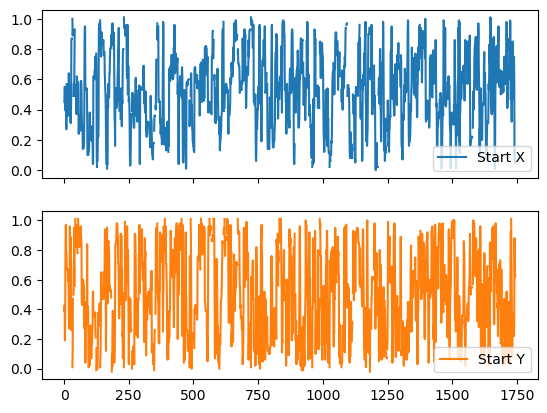

In [27]:
sample_game_1_events[["Start X","Start Y"]].plot(subplots=True)

<Axes: xlabel='Team'>

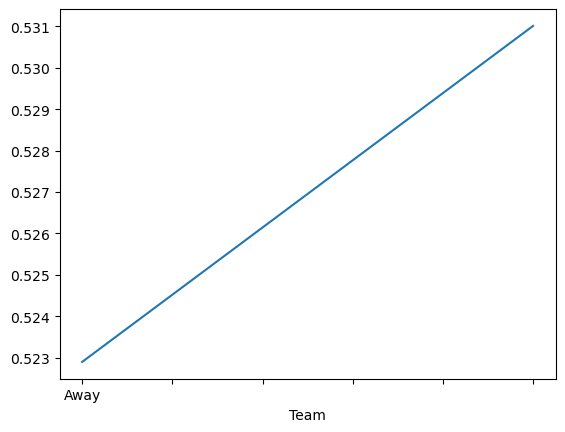

In [39]:
sample_game_1_events["Start X"].groupby(sample_game_1_events["Team"]).mean().plot()

In [37]:
startx_avg_home = sample_game_1_events["Start X"].loc[sample_game_1_events["Team"] == "Home"].mean()
startx_avg_home

0.5310114942528736

In [40]:
startx_avg_away = sample_game_1_events["Start X"].loc[sample_game_1_events["Team"] == "Away"].mean()
startx_avg_away

0.522896725440806

In [41]:
starty_avg_home = sample_game_1_events["Start Y"].loc[sample_game_1_events["Team"] == "Home"].mean()
starty_avg_home

0.5018275862068966

In [42]:
starty_avg_away = sample_game_1_events["Start Y"].loc[sample_game_1_events["Team"] == "Away"].mean()
starty_avg_away

0.503287153652393

In [51]:
XY_avg = {
    "Home Start X": startx_avg_home,
    "Home Start Y": starty_avg_home,
    "Away Start X": startx_avg_away,
    "Away Start Y": starty_avg_away
}
XY_avg

{'Home Start X': 0.5310114942528736,
 'Home Start Y': 0.5018275862068966,
 'Away Start X': 0.522896725440806,
 'Away Start Y': 0.503287153652393}

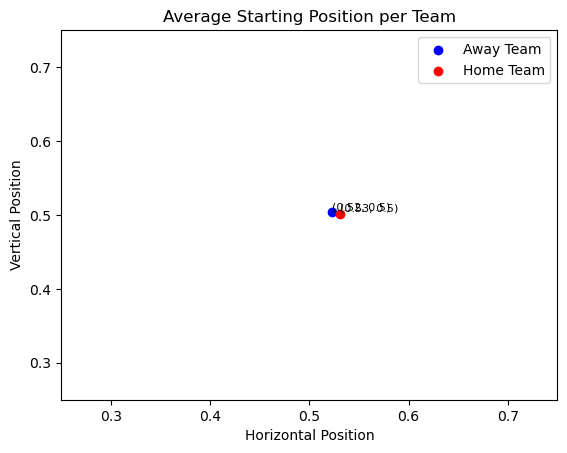

In [63]:
# Create a scatter plot
plt.scatter(startx_avg_away, starty_avg_away, label='Away Team', color='blue', marker='o')
plt.scatter(startx_avg_home, starty_avg_home, label='Home Team', color='red', marker='o')

# Set labels and title
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Average Starting Position per Team')

# Add values as text annotations for each data point
for x, y in zip(x_values, y_values):
    plt.text(x, y, f'({round(x, 2)}, {round(y, 2)})', fontsize=8, ha='left', va='bottom', color='black')

# Set axis boundaries
plt.xlim(0.25,0.75)
plt.ylim(0.25,0.75)

# Display a legend
plt.legend()

# Show the plot
plt.show()

<Axes: xlabel='Team'>

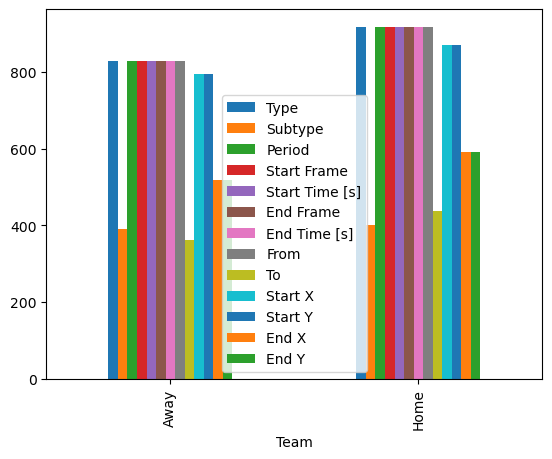

In [102]:
sample_game_1_events.groupby(sample_game_1_events["Team"]).count().plot(kind="bar")

In [98]:
home_type = sample_game_1_events["Team"].loc[sample_game_1_events["Team"] == "Home"].groupby(sample_game_1_events["Type"]).count()
away_type = sample_game_1_events["Team"].loc[sample_game_1_events["Team"] == "Away"].groupby(sample_game_1_events["Type"]).count()
print("Home stats:", home_type)
print("----------")
print("Away stats:", away_type)

Home stats: Type
BALL LOST         129
BALL OUT           18
CARD                2
CHALLENGE         118
FAULT RECEIVED     15
PASS              437
RECOVERY          135
SET PIECE          45
SHOT               18
Name: Team, dtype: int64
----------
Away stats: Type
BALL LOST         128
BALL OUT           33
CARD                2
CHALLENGE         115
FAULT RECEIVED      7
PASS              362
RECOVERY          143
SET PIECE          32
SHOT                6
Name: Team, dtype: int64


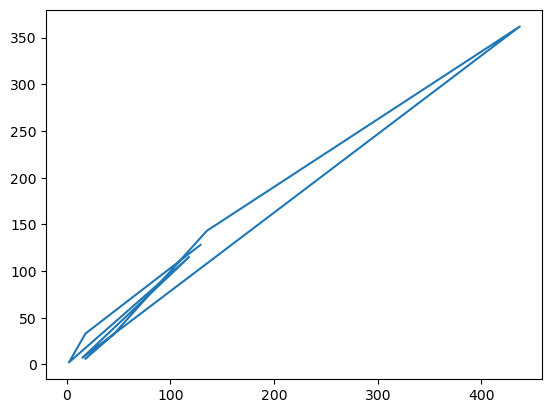

In [99]:
plt.plot(home_type, away_type)

<Axes: >

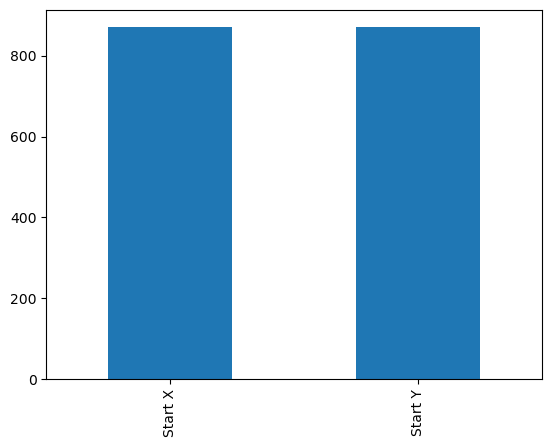

In [70]:
Home_XY_df = sample_game_1_events[['Start X', 'Start Y']].loc[sample_game_1_events['Team'] == "Home"]
Home_XY_df.count().plot(kind="bar")

In [16]:
sample_game_2_events = pd.read_csv('data/Sample_Game_2/Sample_Game_2_RawEventsData.csv')
sample_game_2_events["Subtype"].value_counts()

Subtype
INTERCEPTION                   259
THEFT                           69
TACKLE-LOST                     51
GROUND-LOST                     48
GROUND-WON                      43
HEAD                            41
TACKLE-WON                      37
AERIAL-WON                      35
THROW IN                        32
AERIAL-LOST                     30
FREE KICK                       30
GROUND-FAULT-LOST               17
HEAD-INTERCEPTION               15
GOAL KICK                       12
GROUND-FAULT-WON                11
TACKLE-FAULT-WON                 9
CROSS-INTERCEPTION               8
CROSS                            8
KICK OFF                         7
CORNER KICK                      7
CLEARANCE                        7
SAVED                            6
FORCED                           6
YELLOW                           6
ON TARGET-SAVED                  6
TACKLE-FAULT-LOST                6
BLOCKED                          5
HEAD-OFF TARGET-OUT              5
OFF TARGET-O

In [111]:
sample_game_1_events["Distance X"] = abs(sample_game_1_events["Start X"] - sample_game_1_events["End X"])
print(f"Total distance run:",sample_game_1_events["Distance X"].sum())
print(f"Total home team distance run:",sample_game_1_events["Distance X"].loc[sample_game_1_events["Team"] == "Home"].sum())
print(f"Total away team distance run:",sample_game_1_events["Distance X"].loc[sample_game_1_events["Team"] == "Away"].sum())

Total distance run: 121.79
Total home team distance run: 64.30000000000001
Total away team distance run: 57.489999999999995


In [112]:
sample_game_1_events["Distance Y"] = abs(sample_game_1_events["Start Y"] - sample_game_1_events["End Y"])
print(f"Total distance run:",sample_game_1_events["Distance Y"].sum())
print(f"Total home team distance run:",sample_game_1_events["Distance Y"].loc[sample_game_1_events["Team"] == "Home"].sum())
print(f"Total away team distance run:",sample_game_1_events["Distance Y"].loc[sample_game_1_events["Team"] == "Away"].sum())

Total distance run: 189.86
Total home team distance run: 99.79999999999998
Total away team distance run: 90.06


In [113]:
sample_game_1_events["Distance Z"] = np.sqrt(((sample_game_1_events["End X"] - sample_game_1_events["Start X"]) ** 2) + ((sample_game_1_events["End Y"] - sample_game_1_events["Start Y"]) ** 2))
print(f"Total distance run:",sample_game_1_events["Distance Z"].sum())
print(f"Total home team distance run:",sample_game_1_events["Distance Z"].loc[sample_game_1_events["Team"] == "Home"].sum())
print(f"Total away team distance run:",sample_game_1_events["Distance Z"].loc[sample_game_1_events["Team"] == "Away"].sum())

Total distance run: 247.17785287821508
Total home team distance run: 130.03019136897615
Total away team distance run: 117.14766150923892


<Axes: xlabel='Period,Team'>

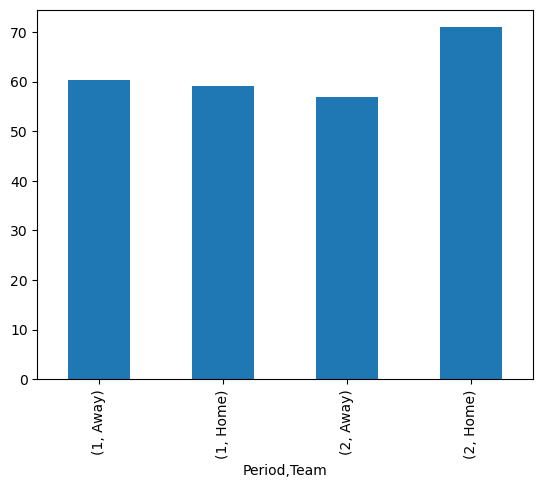

In [125]:
sample_game_1_events["Distance Z"].groupby([sample_game_1_events["Period"],sample_game_1_events["Team"]]).sum().plot(kind="bar")

In [127]:
sample_game_1_events.to_csv("distance.csv")